# handheld splitting, RNN schema

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [38]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns
sns.set_context('talk')

In [5]:
paramD = {
  'sticky_decay': 0.02, 
  'pe_thresh': 0.9, 
  'init_lr': 0.45, 
  'lr_decay': 0.25, 
  'stsize': 6.0
}

### prstay decay 

Text(0.5, 0, '# times schema used')

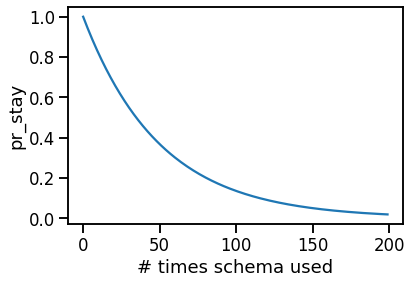

In [39]:
nupdates = np.arange(200)
sticky_decay = paramD['sticky_decay']
pr_stay = np.exp(-sticky_decay*nupdates)
plt.plot(pr_stay)
plt.ylabel('pr_stay')
plt.xlabel('# times schema used')

### how often each schema condition is entered

In [35]:
# how many times enters each condition of splitting
L = [[],[]]
ns = 20
for s in range(ns):
  for ci,cond in enumerate(['blocked','interleaved']):
      ag = Agent(**paramD)
      task = Task()
      exp,cur = task.generate_experiment(cond,160,40)
      ag.forward_exp(exp) 
      L[ci].append(ag.sch_conditions)

[[ 92.8   25.7   80.5 ]
 [ 65.35   0.   133.65]]


(0.0, 200.0)

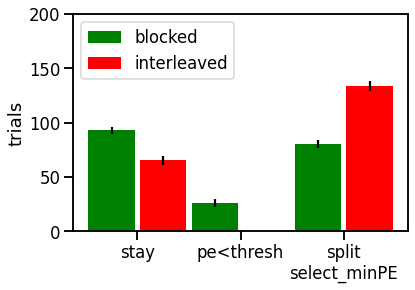

In [63]:
split_data = np.array(L)
M = split_data.mean(1)
print(M)
S = split_data.std(1)/np.sqrt(ns)
ax = plt.gca()
for i in range(3):
  for c in range(2):
    ax.bar(i+0.5*c,M[c,i],
           width=0.45,yerr=S[c,i],
           color=['g','r'][c])
ax.legend(['blocked','interleaved'],loc=2)
ax.set_xticks(np.arange(3)+0.25)
ax.set_xticklabels(['stay','pe<thresh','split\nselect_minPE'])
ax.set_ylabel('trials')
ax.set_ylim(0,200)